Perform clustering (**hierarchical,K means clustering and DBSCAN**) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

**Data Description:**

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [70]:
airlines=pd.read_csv("/content/drive/MyDrive/Assignment/air.csv")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [71]:
#Copy the data 
df =airlines.copy()

In [72]:
df = df.iloc[:,1:]

In [73]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


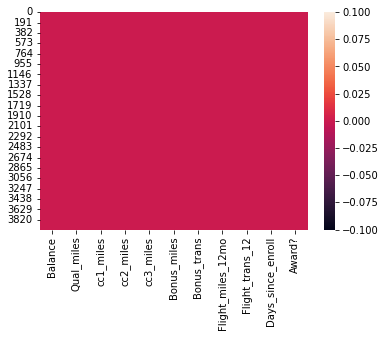

In [74]:
sns.heatmap(df.isnull())

In [75]:
#Check for data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [76]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

**Using Normalization function**

In [77]:
# normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [78]:
df_norm=norm_func(airlines.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


**Using Standardize Function**

In [79]:
def standardize(x):
    y = (x-x.mean())/((x.std()))
    return y
df_scaled = standardize(df)
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


**KMeans Clustering**

Text(0.5, 1.0, 'Elbow Plot')

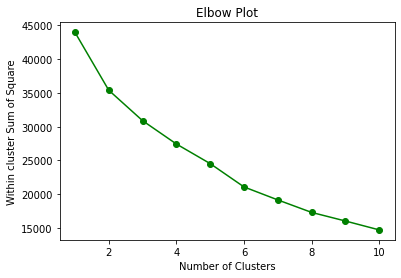

In [80]:
# To find the value of K 
WCSS = [] # within cluster sum of square
for i in range (1,11):
    model = KMeans(n_clusters=i,random_state=0)
    model = model.fit(df_scaled)
    WCSS.append(model.inertia_)

plt.plot(range(1,11),WCSS,'go-')
plt.xlabel("Number of Clusters")
plt.ylabel("Within cluster Sum of Square")
plt.title("Elbow Plot")

Will consider Number of Clusters as 6

In [81]:
# Selecting 6 clusters from the above elbow plot which is the optimum number of clusters 
from sklearn.cluster import KMeans
# Building Model with Number of Clusters = 6
KMeans_model = KMeans(n_clusters=6,random_state=0)
KMeans_model = KMeans_model.fit(df_scaled)


In [82]:
# Classified Cluster lables
KMeans_model.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [83]:
# Attach to df
df["KMeans_n6"] = KMeans_model.labels_ 
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_n6
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [84]:
#Group by clusters 
df.groupby(["KMeans_n6"]).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_n6,,,,,,,,,,,
0,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,43882.372895,43.558140,1.229751,1.000000,1.000401,4644.210104,6.852847,199.160385,0.621091,3706.378508,0.200882
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


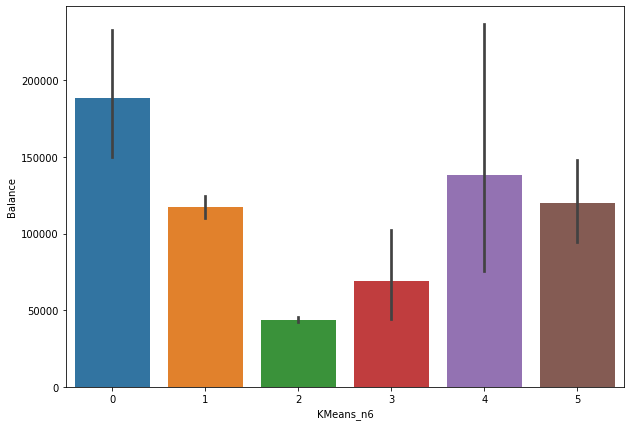

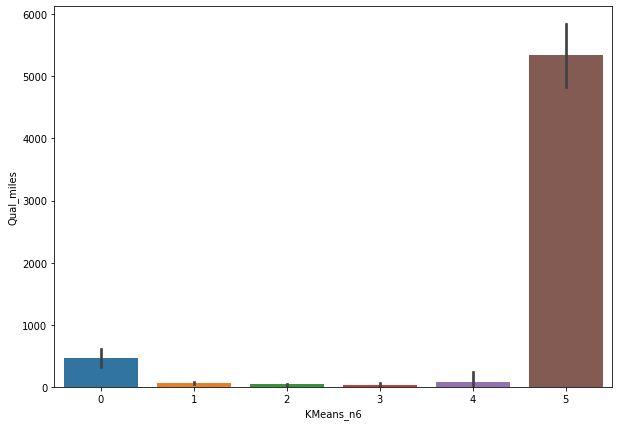

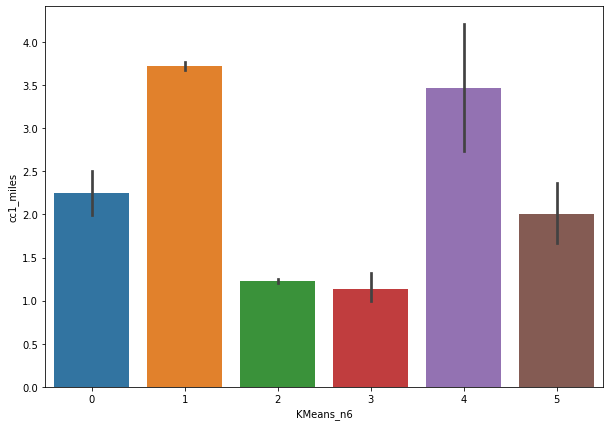

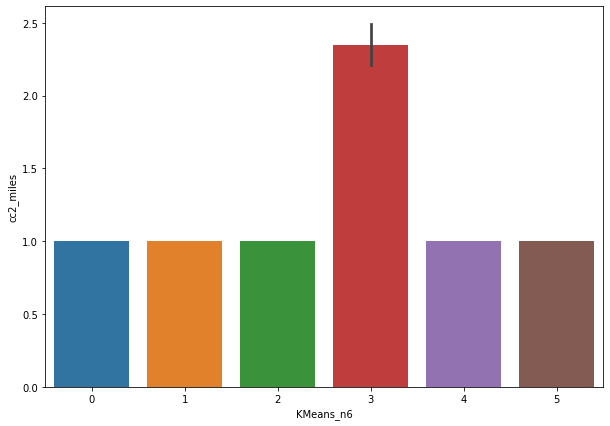

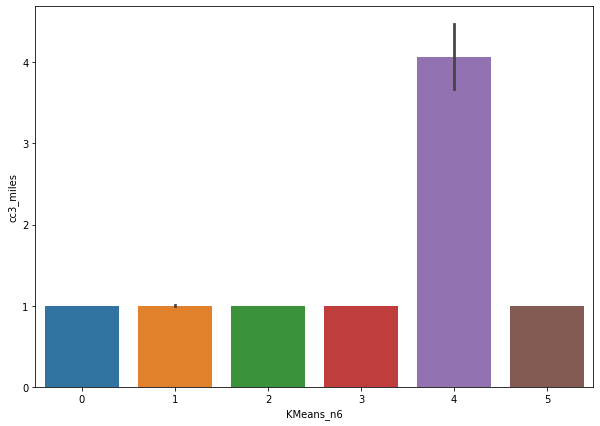

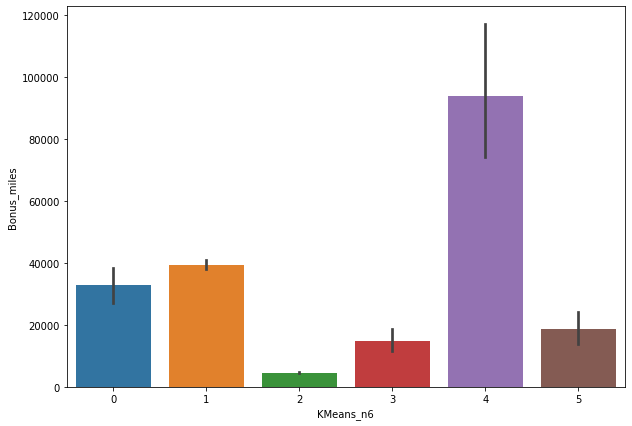

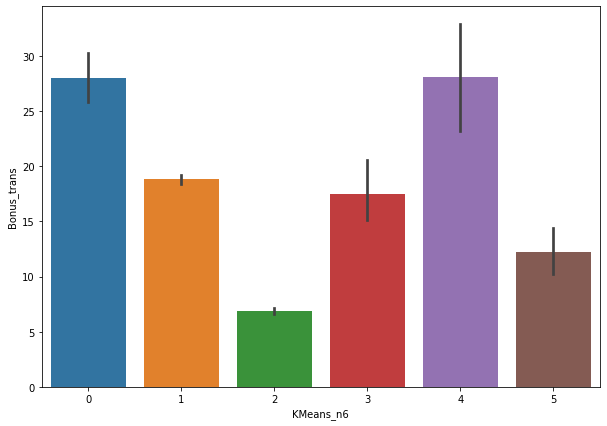

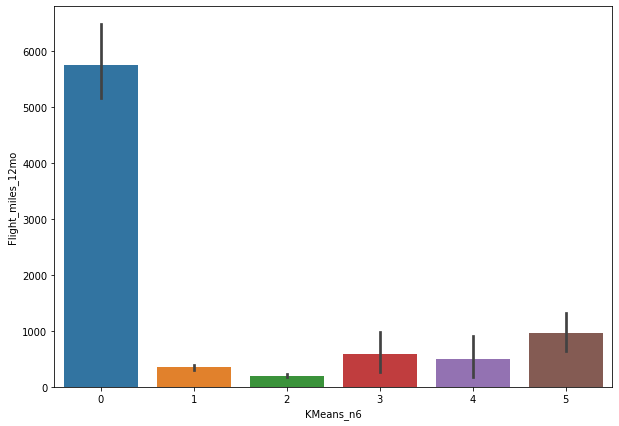

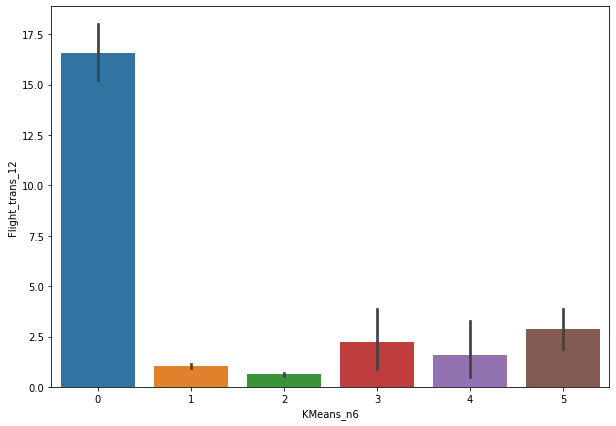

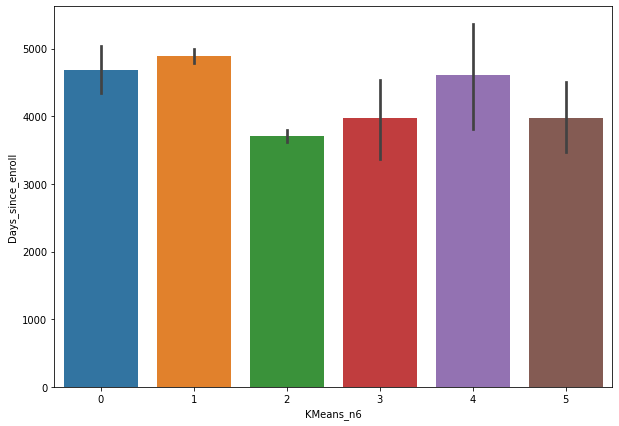

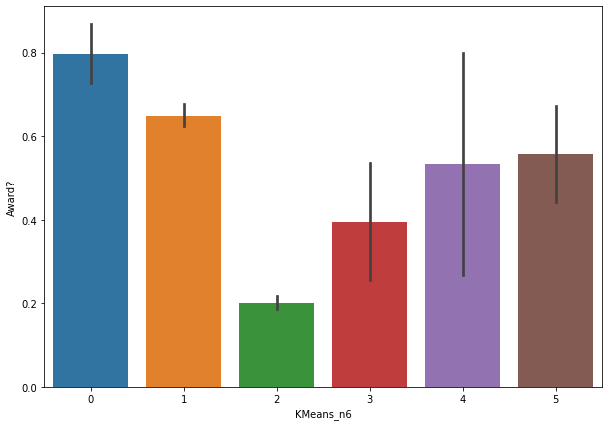

In [85]:
# Plot Clusters
for i in range(0,11):
    plt.figure(figsize=(10, 7))  
    sns.barplot(y=df.iloc[:,i],x=df["KMeans_n6"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


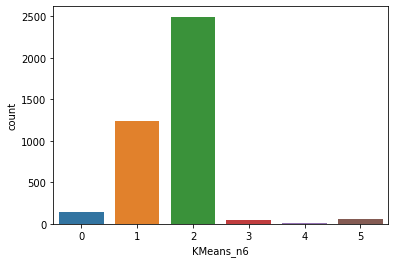

In [86]:
sns.countplot(df["KMeans_n6"])

**Hirarchical Clustering**

In [87]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_n6
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


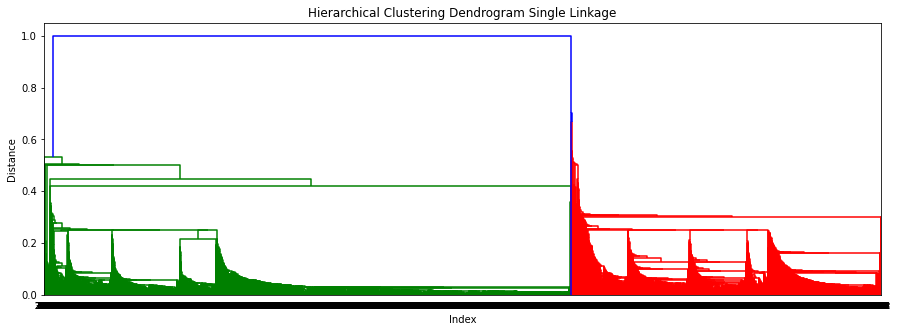

In [88]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram Single Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.  # font size for the x axis labels
)
plt.show()

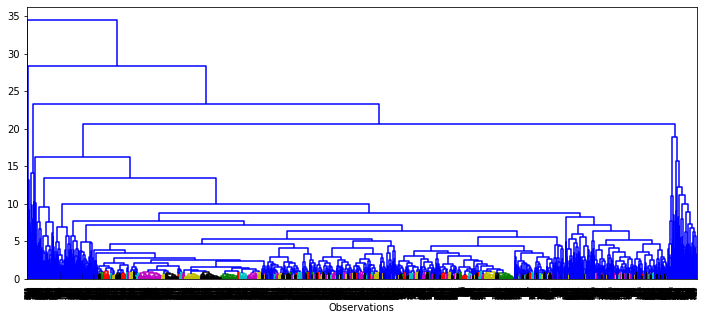

In [89]:
# create the dendogram
plt.figure(figsize=(12,5)) 
sch.dendrogram(sch.linkage(df_scaled.iloc[:,:12],method="complete"),color_threshold=1)
plt.xlabel("Observations")
plt.show()

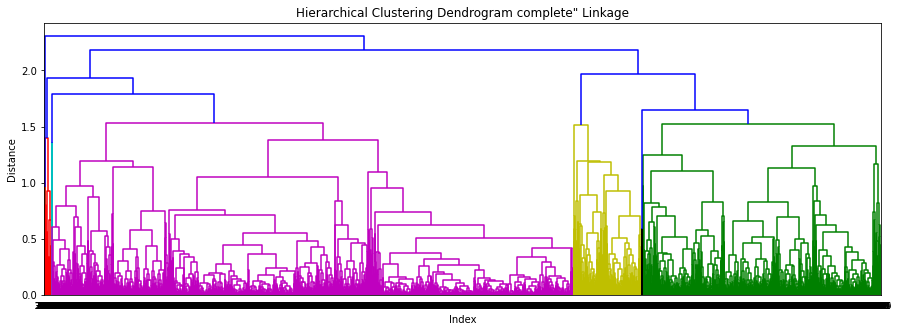

In [90]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram complete" Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.  # font size for the x axis labels
)
plt.show()

In [91]:
#To create Hierarchical clustring
hierar_cluster = AgglomerativeClustering(n_clusters=6, affinity="euclidean",linkage="complete")
hierar_cluster.fit_predict(df_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
df["Hierar_cluster"] =hierar_cluster.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_n6,Hierar_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [93]:
df.drop(columns=["KMeans_n6"]).groupby("Hierar_cluster").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Hierar_cluster,,,,,,,,,,,
0,65902.071655,137.370703,2.033580,1.000000,1.000793,15571.369910,10.724484,270.585405,0.818350,4072.294553,0.350344
1,133459.291339,334.472441,2.629921,1.000000,1.000000,45139.023622,29.842520,5246.244094,15.157480,4949.787402,0.811024
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


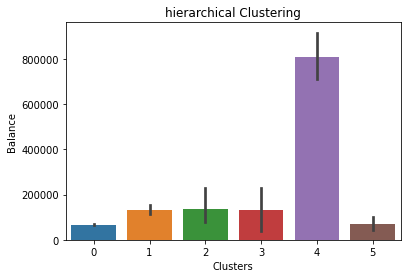

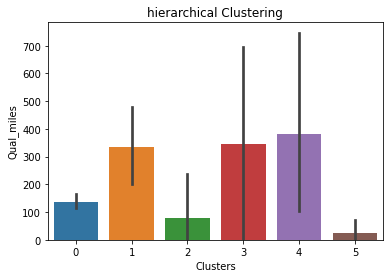

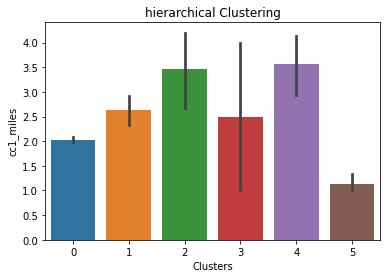

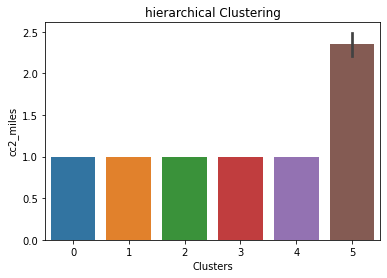

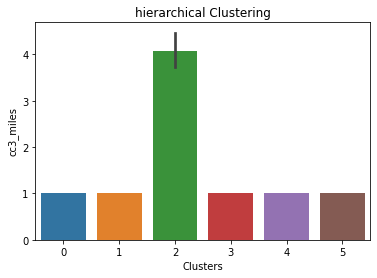

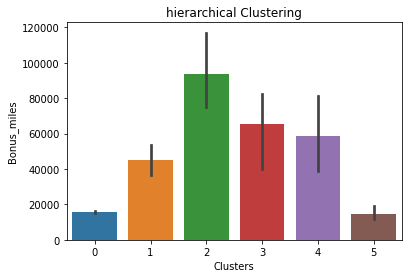

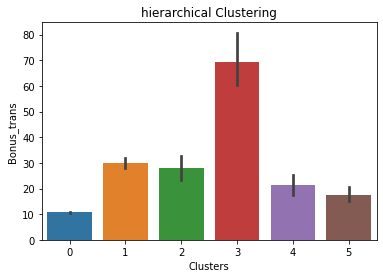

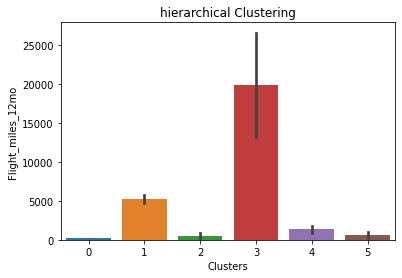

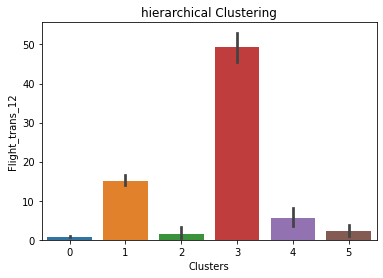

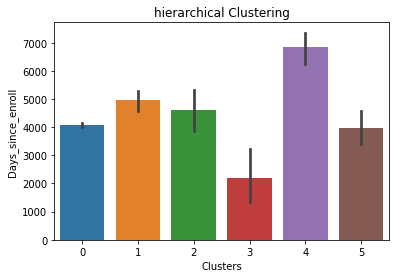

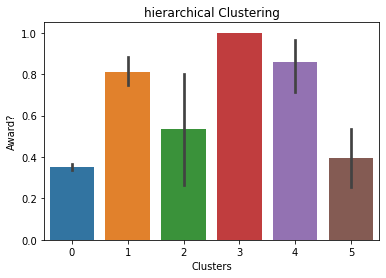

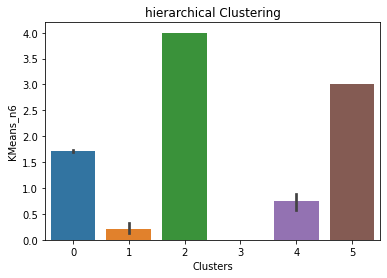

In [94]:
for i in range(0,12):
    sns.barplot(y=df.iloc[:,i],x=df["Hierar_cluster"])
    plt.xlabel("Clusters")
    plt.ylabel(df.columns[i])
    plt.title(f"hierarchical Clustering")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


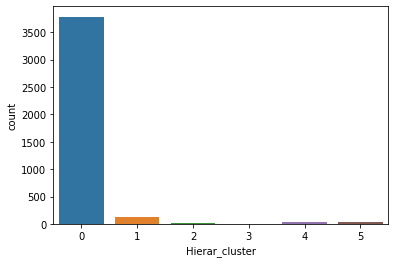

In [95]:
sns.countplot(df["Hierar_cluster"])

**DBSCAN Clustering**

In [96]:
dbscan = DBSCAN(eps=0.2,min_samples=8)
dbscan.fit(df_scaled)

DBSCAN(eps=0.2, min_samples=8)

In [97]:
df["DBSCAN"] = dbscan.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_n6,Hierar_cluster,DBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,-1


In [98]:
#Group by clusters 
df.drop(columns=["KMeans_n6","Hierar_cluster"]).groupby(["DBSCAN"]).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
DBSCAN,,,,,,,,,,,
-1,89400.731473,184.893808,2.35932,1.018608,1.01572,21777.711261,14.136991,590.235162,1.762271,4383.435675,0.475136
0,17718.819831,0.000000,1.00000,1.000000,1.00000,682.960097,2.174123,0.000000,0.000000,3076.663845,0.000000
1,12918.666667,0.000000,1.00000,1.000000,1.00000,64.333333,0.333333,0.000000,0.000000,8162.466667,0.000000
2,19245.750000,0.000000,1.00000,1.000000,1.00000,2146.375000,10.750000,0.000000,0.000000,6323.625000,0.000000
3,23506.363636,0.000000,1.00000,1.000000,1.00000,1822.636364,7.636364,0.000000,0.000000,3901.818182,0.000000
4,28352.500000,0.000000,1.00000,1.000000,1.00000,3599.125000,11.125000,0.000000,0.000000,3556.625000,0.000000
5,14079.153846,0.000000,1.00000,1.000000,1.00000,3794.461538,20.692308,0.000000,0.000000,1396.153846,0.000000


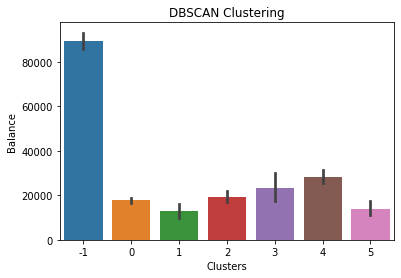

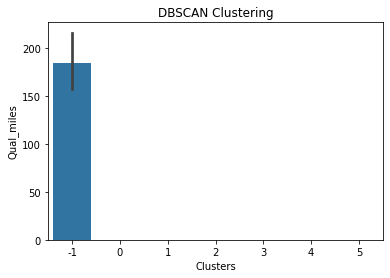

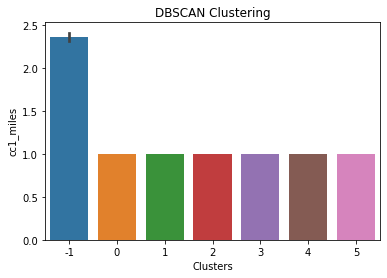

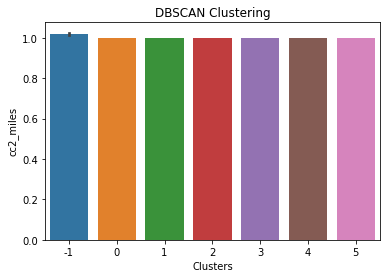

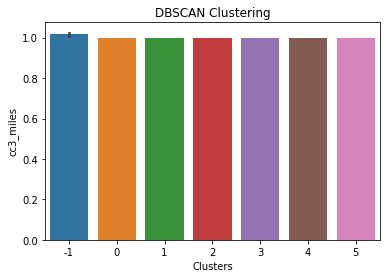

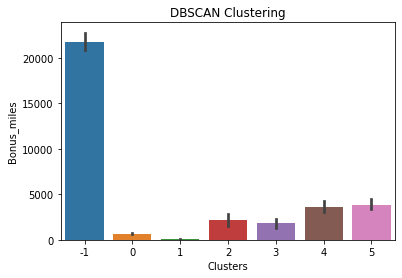

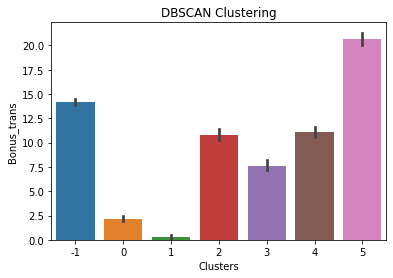

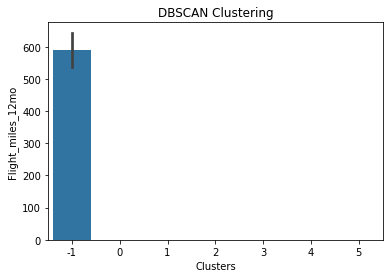

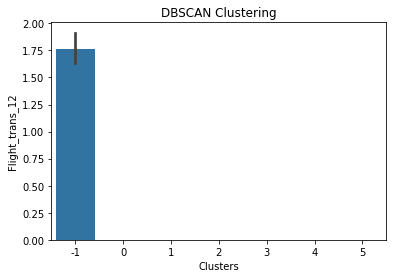

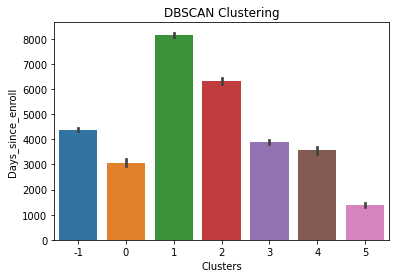

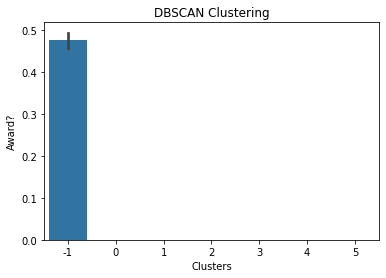

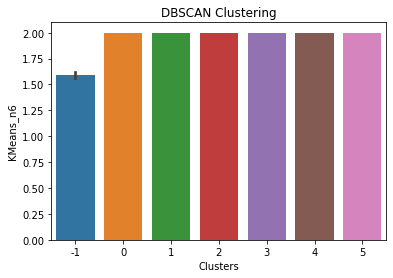

In [99]:
for i in range(0,12):
    sns.barplot(y=df.iloc[:,i],x=df["DBSCAN"])
    plt.xlabel("Clusters")
    plt.ylabel(df.columns[i])
    plt.title(f"DBSCAN Clustering")
    plt.show()

In [100]:
df.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
KMeans_n6                1.681670
Hierar_cluster           0.124031
DBSCAN                  -0.739185
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


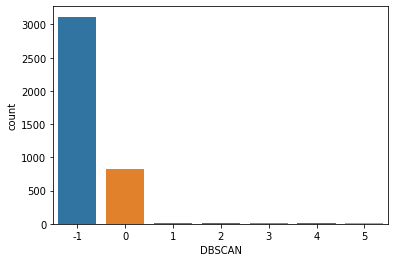

In [101]:
sns.countplot(df["DBSCAN"])